In [59]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix


from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
image_folder = '/content/drive/My Drive/569 Project/DSO569ProjectData'

In [3]:
os.listdir(image_folder)

['LICENSE', 'README.md', '.DS_Store', 'ai-midjourney', 'real']

In [4]:
# Initialize empty lists to store images and their corresponding labels
images = []
labels = []

# Iterate through subfolders (classes)
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                # Open and load the image
                with Image.open(image_path) as img:
                    # Convert the image to a NumPy array
                    img_array = np.array(img)
                    # Append the image array to the list of images
                    images.append(img_array)
                    # Append the label corresponding to the folder
                    labels.append(class_name)
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert the lists of images and labels into NumPy arrays
images_array = np.array(images)
labels_array = np.array(labels)

# Print the shapes of the resulting arrays
print("Shape of images array:", images_array.shape)
print("Shape of labels array:", labels_array.shape)

Shape of images array: (2181, 240, 240, 3)
Shape of labels array: (2181,)


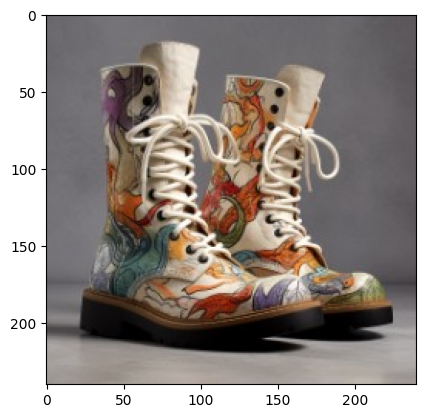

In [5]:
plt.imshow(images_array[0])

In [6]:
labels_array[0]

'ai-midjourney'

In [7]:
# Transform the labels of folder name into binary representations
binary_labels = []

for x in labels_array:
    if x == 'ai-midjourney':
        binary_labels.append(0)
    else:
         binary_labels.append(1)

binary_labels = np.array(binary_labels)


In [8]:
binary_labels

array([0, 0, 0, ..., 1, 1, 1])

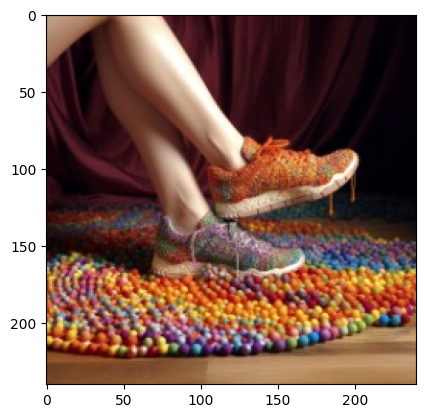

In [9]:
# Display one image of the dataset
plt.imshow(images_array[800])

In [10]:
print(labels_array[800])

ai-midjourney


In [11]:
# Transform the labels of folder name into binary representations
binary_labels = []

for x in labels_array:
    if x == 'ai-midjourney':
        binary_labels.append(0)
    else:
         binary_labels.append(1)

binary_labels = np.array(binary_labels)

In [19]:
binary_labels.sum()

825

In [12]:
images_array[1].shape

(240, 240, 3)

In [13]:
train_images, test_images, train_labels, test_labels = train_test_split(
                                                        images_array, binary_labels, test_size=0.2,
                                                        random_state=42, stratify = binary_labels)

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [15]:
def create_model_cnn():
  model = Sequential()

  # 1st Convolution layer;
  model.add(Conv2D(32, (3, 3), activation='relu',
                  padding='same', input_shape=(240, 240, 3)))  ## 1 in input_shape for Gray; 3 for Color
  # 1st Pooling layer
  model.add(MaxPooling2D((2, 2)))

  # 2nd Convolution layer
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  # 2st Pooling layer
  model.add(MaxPooling2D((2, 2)))

  # Flattening
  model.add(Flatten())

  # Full_Connection layer (densely connected layer)
  model.add(Dense(64, activation='relu'))

  # output layer
  model.add(Dense(1, activation='sigmoid'))

  # compile model
  model.compile(optimizer='adam',
                loss= 'binary_crossentropy',
                metrics=['accuracy'])

  return model

In [16]:
model_cnn = create_model_cnn()
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 120, 120, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 60, 60, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 230400)            0         
                                                                 
 dense (Dense)               (None, 64)                1

In [17]:
## callback

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_accuracy",
        save_best_only=True,
    )
]


fit_callbacklist = model_cnn.fit(train_images,  train_labels, epochs=25,
          batch_size=200, validation_split=0.2,
          callbacks=callbacks_list)

model = keras.models.load_model("checkpoint_path.keras")
model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/25
7/7 [==============================] - 25s 2s/step - loss: 3.6195 - accuracy: 0.5699 - val_loss: 0.4374 - val_accuracy: 0.8539
Epoch 2/25
7/7 [==============================] - 5s 739ms/step - loss: 0.3673 - accuracy: 0.8695 - val_loss: 0.3772 - val_accuracy: 0.8567
Epoch 3/25
7/7 [==============================] - 2s 331ms/step - loss: 0.2874 - accuracy: 0.9011 - val_loss: 0.3217 - val_accuracy: 0.8453
Epoch 4/25
7/7 [==============================] - 3s 465ms/step - loss: 0.2352 - accuracy: 0.9090 - val_loss: 0.2512 - val_accuracy: 0.8968
Epoch 5/25
7/7 [==============================] - 2s 312ms/step - loss: 0.1628 - accuracy: 0.9398 - val_loss: 0.2364 - val_accuracy: 0.8940
Epoch 6/25
7/7 [==============================] - 3s 464ms/step - loss: 0.1276 - accuracy: 0.9556 - val_loss: 0.1987 - val_accuracy: 0.9198
Epoch 7/25
7/7 [==============================] - 5s 711ms/step - loss: 0.0856 - accuracy: 0.9756 - val_loss: 0.2024 - val_accuracy: 0.9226
Epoch 8/25
7/7 [======

[0.2302560657262802, 0.9382150769233704]

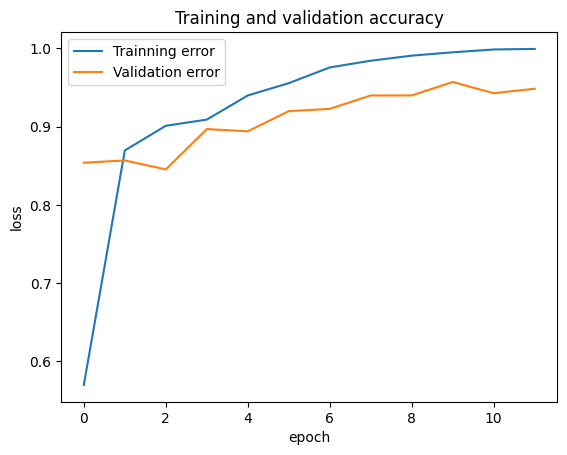

In [18]:
# plot the trainng and validation errors
plt.plot(fit_callbacklist.history['accuracy'])
plt.plot(fit_callbacklist.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Trainning error', 'Validation error'], loc='upper left')
plt.show()

In [ ]:
test_images,  test_labels

In [24]:
predictions_array = model.predict(test_images)

14/14 [==============================] - 0s 25ms/step


In [26]:
pred_labels_array = [1 if prediction > 0.5 else 0 for prediction in predictions_array]

In [48]:
matching_indices = [i for i, (output, label) in enumerate(zip(pred_labels_array, test_labels)) if output == label]
nonmatching_indices = [i for i, (output, label) in enumerate(zip(pred_labels_array, test_labels)) if output != label]

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_incorrect_examples(test_images, test_labels, predictions, indices, num_of_pics):
    """
    Plot a specified number of images where predictions did not match the labels.

    Parameters:
        test_images (numpy array): Array of images.
        test_labels (list): Actual labels of the images.
        predictions (list): Predicted labels of the images.
        indices (list): Indices where predictions did not match the labels.
        num_of_pics (int): Number of incorrect examples to display.
    """
    # Limit the number of incorrect examples to display
    num_images = min(num_of_pics, len(indices))

    # Setting up the plot grid
    cols = 3  # Number of columns in the plot grid
    rows = (num_images + cols - 1) // cols  # Number of rows in the plot grid

    fig, axes = plt.subplots(rows, cols, figsize=(10, 4*rows))
    axes = axes.flatten()

    for i in range(num_images):
        idx = indices[i]
        ax = axes[i]
        ax.imshow(test_images[idx], cmap='gray', interpolation='none')  # Assuming images are grayscale
        ax.set_title(f"Pred: {predictions[idx]}, True: {test_labels[idx]}")
        ax.axis('off')

    # Hide any unused axes if the number of images isn't a perfect multiple of the column count
    for ax in axes[num_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_incorrect_examples(test_images, test_labels, predictions, nonmatching_indices, num_of_pics)

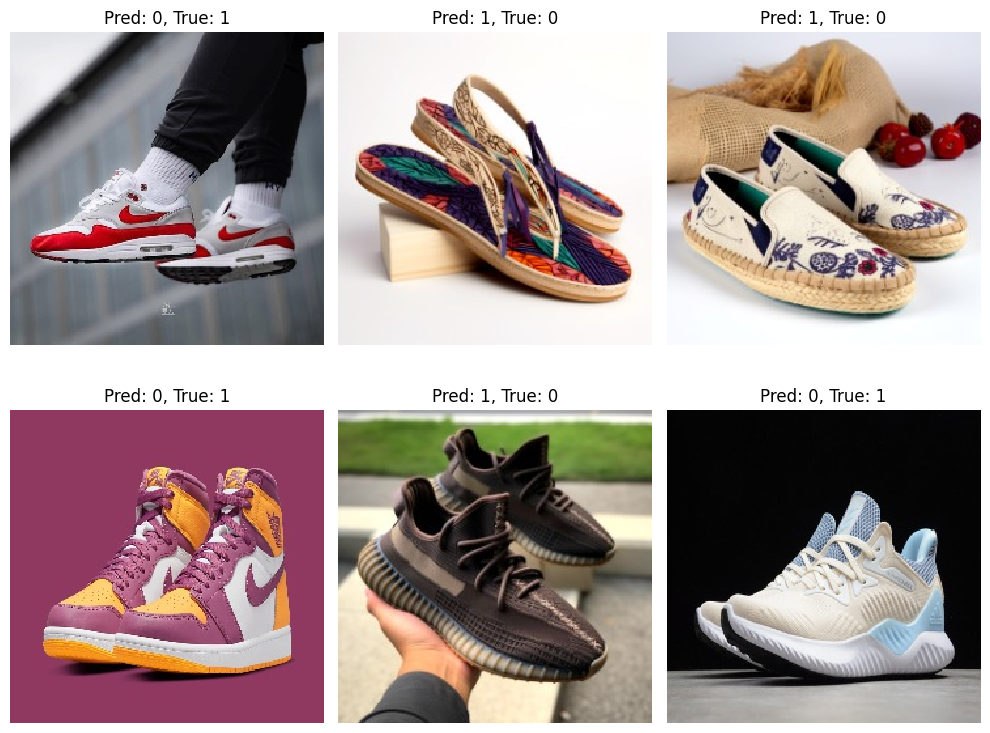

In [57]:
plot_incorrect_examples(test_images, test_labels, pred_labels_array, nonmatching_indices, 6)

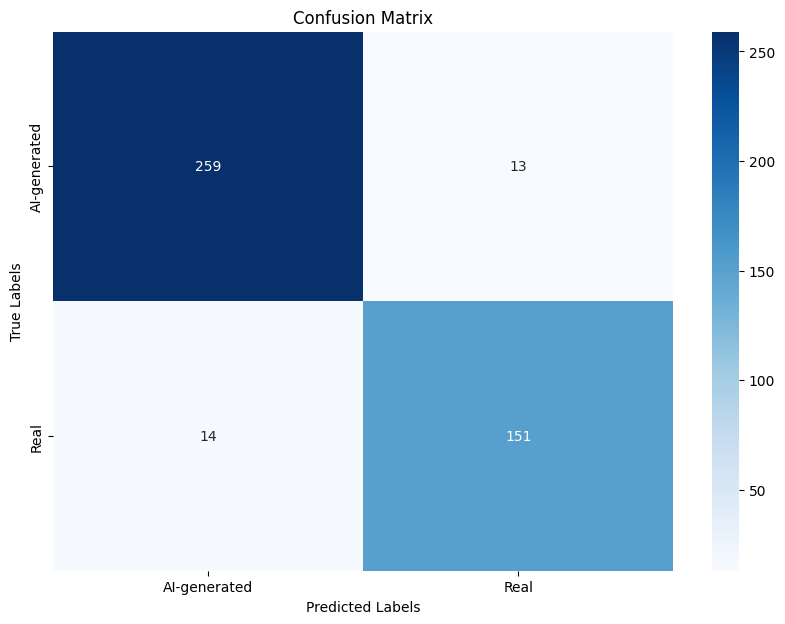

In [65]:
cm = confusion_matrix(test_labels, pred_labels_array)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['AI-generated', 'Real'], yticklabels=['AI-generated', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()